## Tesla 주가 예측 실습
 * 2018년 ~ 2021년 데이터를 활용해 2022년 결과를 예측하고 실제값과 비교
 * Convoluation 1D 사용

In [375]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit

### 데이터 불러오기
* 데이터 출처 : yahoo finance(https://finance.yahoo.com/quote/TSLA/history?period1=1514764800&period2=1669334400&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true)

In [376]:
raw_df = pd.read_csv('./TSLA.csv')  
raw_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,20.799999,21.474001,20.733334,21.368668,21.368668,65283000
1,2018-01-03,21.400000,21.683332,21.036667,21.150000,21.150000,67822500
2,2018-01-04,20.858000,21.236668,20.378668,20.974667,20.974667,149194500
3,2018-01-05,21.108000,21.149332,20.799999,21.105333,21.105333,68868000
4,2018-01-08,21.066668,22.468000,21.033333,22.427334,22.427334,147891000
...,...,...,...,...,...,...,...
1229,2022-11-17,183.960007,186.160004,180.899994,183.169998,183.169998,64336000
1230,2022-11-18,185.050003,185.190002,176.550003,180.190002,180.190002,75904900
1231,2022-11-21,175.850006,176.770004,167.539993,167.869995,167.869995,92882700
1232,2022-11-22,168.630005,170.919998,166.190002,169.910004,169.910004,78452300


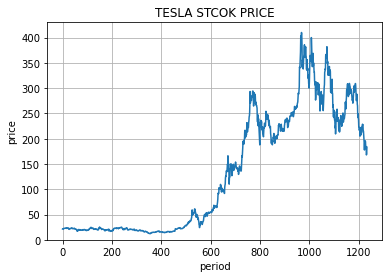

In [377]:
# 그래프로 추이 확인 
# 최종가 기준

plt.title('TESLA STCOK PRICE')
plt.ylabel('price')
plt.ylim(0, 430)
plt.xlabel('period')
plt.grid()
plt.plot(raw_df['Adj Close'], label='Adj Close')

plt.show()

In [378]:
# 초반에 주가가 너무 낮음 
df_2018 = raw_df[raw_df['Date'] <= '2019-01-01']
df_2018

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,20.799999,21.474001,20.733334,21.368668,21.368668,65283000
1,2018-01-03,21.400000,21.683332,21.036667,21.150000,21.150000,67822500
2,2018-01-04,20.858000,21.236668,20.378668,20.974667,20.974667,149194500
3,2018-01-05,21.108000,21.149332,20.799999,21.105333,21.105333,68868000
4,2018-01-08,21.066668,22.468000,21.033333,22.427334,22.427334,147891000
...,...,...,...,...,...,...,...
246,2018-12-24,20.900000,20.966667,19.680000,19.692667,19.692667,83398500
247,2018-12-26,20.000000,21.798000,19.606001,21.739332,21.739332,122446500
248,2018-12-27,21.322666,21.478001,20.100000,21.075333,21.075333,128626500
249,2018-12-28,21.540001,22.416000,21.227333,22.257999,22.257999,149085000


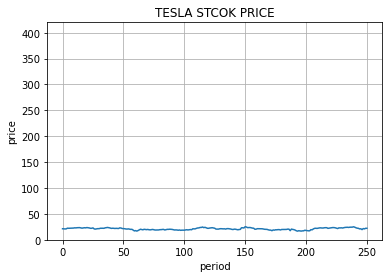

In [379]:
# 2018 주가 확인
plt.title('TESLA STCOK PRICE')
plt.ylabel('price')
plt.ylim(0, 420)
plt.xlabel('period')
plt.grid()
plt.plot(df_2018['Adj Close'], label='Adj Close')

plt.show()

In [380]:
# 현재주가 예측에 있어서 정확도를 떨어뜨릴 것 같아 빼기로 함

raw_df = raw_df[raw_df['Date'] >= '2019-01-01']
raw_df

,Date,Open,High,Low,Close,Adj Close,Volume
251,2019-01-02,20.406668,21.008667,19.920000,20.674667,20.674667,174879000
252,2019-01-03,20.466667,20.626667,19.825333,20.024000,20.024000,104478000
253,2019-01-04,20.400000,21.200001,20.181999,21.179333,21.179333,110911500
254,2019-01-07,21.448000,22.449333,21.183332,22.330667,22.330667,113268000
255,2019-01-08,22.797333,22.934000,21.801332,22.356667,22.356667,105127500
...,...,...,...,...,...,...,...
1229,2022-11-17,183.960007,186.160004,180.899994,183.169998,183.169998,64336000
1230,2022-11-18,185.050003,185.190002,176.550003,180.190002,180.190002,75904900
1231,2022-11-21,175.850006,176.770004,167.539993,167.869995,167.869995,92882700
1232,2022-11-22,168.630005,170.919998,166.190002,169.910004,169.910004,78452300


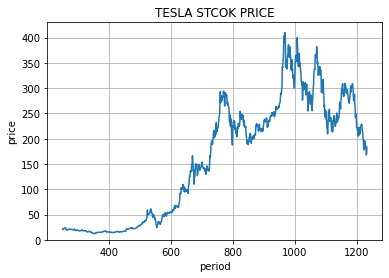

In [381]:
plt.title('TESLA STCOK PRICE')
plt.ylabel('price')
plt.ylim(0, 430)
plt.xlabel('period')
plt.grid()
plt.plot(raw_df['Adj Close'], label='Adj Close')

plt.show()

### 데이터 전처리

In [382]:
# 통계 정보 확인
raw_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,983.000000,983.000000,983.000000,983.000000,983.000000,9.830000e+02
mean,159.477633,163.171535,155.405202,159.363110,159.363110,1.332937e+08
std,117.940238,120.578623,114.906614,117.733191,117.733191,9.466376e+07
min,12.073333,12.445333,11.799333,11.931333,11.931333,2.940180e+07
25%,26.210667,27.328333,25.886000,26.987667,26.987667,7.312650e+07
50%,190.779999,195.729996,182.589996,190.563339,190.563339,1.000119e+08
75%,253.014999,257.413330,246.396667,252.541664,252.541664,1.582928e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


In [383]:
# 결측치 확인
raw_df.isnull().sum()

# lucky~~~

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [384]:
# 정규화

scaler = MinMaxScaler()
scale_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
scaled_df = scaler.fit_transform(raw_df[scale_cols])
scaled_df = pd.DataFrame(scaled_df, columns=scale_cols)

print(scaled_df)

         Open      High       Low     Close  Adj Close    Volume
0    0.020865  0.021299  0.020618  0.021966   0.021966  0.164440
1    0.021015  0.020349  0.020377  0.020331   0.020331  0.084863
2    0.020848  0.021775  0.021283  0.023234   0.023234  0.092135
3    0.023472  0.024882  0.023825  0.026126   0.026126  0.094798
4    0.026850  0.026088  0.025394  0.026192   0.026192  0.085597
..        ...       ...       ...       ...        ...       ...
978  0.430366  0.432071  0.429334  0.430206   0.430206  0.039488
979  0.433095  0.429658  0.418290  0.422719   0.422719  0.052565
980  0.410060  0.408716  0.395414  0.391768   0.391768  0.071756
981  0.391983  0.394165  0.391986  0.396893   0.396893  0.055444
982  0.404352  0.425753  0.408007  0.430281   0.430281  0.090581

[983 rows x 6 columns]


In [385]:
# 2022년 idx를 기준으로 분리
idx = raw_df[raw_df.Date <= '2022-01-01'].shape[0]

TRAIN = scaled_df[0:idx]
TEST = scaled_df[idx:]

print(TRAIN.shape)
print(TEST.shape)

(757, 6)
(226, 6)


In [386]:
# 입력 파라미터 feature, label => numpy type

def make_sequene_dataset(feature, label, window_size):

    feature_list = []      # 생성될 feature list
    label_list = []        # 생성될 label list

    for i in range(len(feature)-window_size):

        feature_list.append(feature[i:i+window_size])
        label_list.append(label[i+window_size])

    return np.array(feature_list), np.array(label_list)

In [387]:
# feature_df, label_df 생성

feature_cols = [ 'Adj Close' ]
label_cols = [ 'Adj Close' ]

train_feature = pd.DataFrame(TRAIN, columns=feature_cols)
test_feature = pd.DataFrame(TEST, columns=feature_cols)
train_label =  pd.DataFrame(TRAIN, columns=label_cols)
test_label =  pd.DataFrame(TEST, columns=label_cols)

In [388]:
# DataFrame => Numpy 변환

train_feature_np = train_feature.to_numpy()
test_feature_np = test_feature.to_numpy()
train_label_np = train_label.to_numpy()
test_label_np = test_label.to_numpy()

print(train_feature_np.shape, train_label_np.shape)
print(test_feature_np.shape, test_label_np.shape)

(757, 1) (757, 1)
(226, 1) (226, 1)


In [389]:
window_size = 30

x_train, y_train = make_sequene_dataset(train_feature_np, train_label_np, window_size)
x_test, y_test = make_sequene_dataset(test_feature_np, test_label_np, window_size)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(727, 30, 1) (727, 1)
(196, 30, 1) (196, 1)


In [390]:
x_train

array([[[0.02196604],
        [0.02033136],
        [0.02323392],
        ...,
        [0.02242161],
        [0.02224909],
        [0.02163944]],

       [[0.02033136],
        [0.02323392],
        [0.02612644],
        ...,
        [0.02224909],
        [0.02163944],
        [0.02090249]],

       [[0.02323392],
        [0.02612644],
        [0.02619176],
        ...,
        [0.02163944],
        [0.02090249],
        [0.02159087]],

       ...,

       [[0.81867757],
        [0.85329732],
        [0.88200474],
        ...,
        [0.86357269],
        [0.88613334],
        [0.88155255]],

       [[0.85329732],
        [0.88200474],
        [0.88817667],
        ...,
        [0.88613334],
        [0.88155255],
        [0.87964316]],

       [[0.88200474],
        [0.88817667],
        [0.92224371],
        ...,
        [0.88155255],
        [0.87964316],
        [0.86636976]]])

### 모델링

In [404]:
# model 생성

model1 = Sequential()
model1.add(Conv1D(filters=5, kernel_size=10, strides=1, padding='SAME', activation='elu'))
model1.add(Dense(128))
model1.add(Dense(1, activation='linear'))

model1.compile(loss='mse', optimizer='adam', metrics=['mse'])

In [405]:
model2 = Sequential()
model2.add(Dense(128, activation='elu', input_shape=x_train[0].shape))
model2.add(Dense(128, activation='elu'))
model2.add(Dense(1, activation='linear'))

model2.compile(loss='mse', optimizer='adam', metrics=['mse'])

In [406]:
model3 = Sequential()
model3.add(LSTM(128, activation='elu', input_shape=x_train[0].shape))
model3.add(Dense(128, activation='elu'))
model3.add(Dense(1, activation='linear'))

model3.compile(loss='mse', optimizer='adam', metrics=['mse'])

In [394]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5)

model1.fit(x_train, y_train, 
          validation_split=0.2,
          epochs=30, batch_size=16,
          callbacks=[early_stop])

Epoch 1/30
37/37 [==============================] - 2s 12ms/step - loss: 0.0350 - mse: 0.0350 - val_loss: 0.0260 - val_mse: 0.0260
Epoch 2/30
37/37 [==============================] - 0s 4ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0165 - val_mse: 0.0165
Epoch 3/30
37/37 [==============================] - 0s 4ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0156 - val_mse: 0.0156
Epoch 4/30
37/37 [==============================] - 0s 5ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0181 - val_mse: 0.0181
Epoch 5/30
37/37 [==============================] - 0s 3ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0144 - val_mse: 0.0144
Epoch 6/30
37/37 [==============================] - 0s 3ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0145 - val_mse: 0.0145
Epoch 7/30
37/37 [==============================] - 0s 4ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 0.0125 - val_mse: 0.0125
Epoch 8/30
37/37 [==============================] - 0s 5ms/step - loss: 0.0041 - mse: 0.0

In [395]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5)

model2.fit(x_train, y_train, 
          validation_split=0.2,
          epochs=30, batch_size=16,
          callbacks=[early_stop])

Epoch 1/30
37/37 [==============================] - 1s 14ms/step - loss: 0.0096 - mse: 0.0096 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 2/30
37/37 [==============================] - 0s 5ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 3/30
37/37 [==============================] - 0s 5ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 4/30
37/37 [==============================] - 0s 7ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 5/30
37/37 [==============================] - 0s 5ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0134 - val_mse: 0.0134
Epoch 6/30
37/37 [==============================] - 0s 4ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0088 - val_mse: 0.0088
Epoch 7/30
37/37 [==============================] - 0s 4ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0112 - val_mse: 0.0112


In [396]:
early_stop = EarlyStopping(monitor='val_loss', patience=5)

model3.fit(x_train, y_train, 
          validation_split=0.2,
          epochs=30, batch_size=16,
          callbacks=[early_stop])

Epoch 1/30
37/37 [==============================] - 3s 22ms/step - loss: 0.0052 - mse: 0.0052 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2/30
37/37 [==============================] - 1s 15ms/step - loss: 5.8961e-04 - mse: 5.8961e-04 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 3/30
37/37 [==============================] - 1s 17ms/step - loss: 4.1943e-04 - mse: 4.1943e-04 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 4/30
37/37 [==============================] - 1s 16ms/step - loss: 3.9980e-04 - mse: 3.9980e-04 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 5/30
37/37 [==============================] - 1s 16ms/step - loss: 4.3859e-04 - mse: 4.3859e-04 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 6/30
37/37 [==============================] - 1s 16ms/step - loss: 3.8098e-04 - mse: 3.8098e-04 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 7/30
37/37 [==============================] - 1s 18ms/step - loss: 3.5558e-04 - mse: 3.5558e-04 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 8/30
37/37 [=================

In [397]:
# 모델별 mse 확인
mse1 = model1.evaluate(x_test, y_test)
mse2 = model2.evaluate(x_test, y_test)
mse3 = model3.evaluate(x_test, y_test)
print(mse1)
print(mse2)
print(mse3)

7/7 [==============================] - 0s 7ms/step - loss: 0.0011 - mse: 0.0011
[0.012228582985699177, 0.012228582985699177]
[0.010470390319824219, 0.010470390319824219]
[0.0010717888362705708, 0.0010717888362705708]


In [398]:
pred1 = model1.predict(x_test)
pred2 = model2.predict(x_test)
pred3 = model2.predict(x_test)

print(pred1.shape, pred2.shape, pred3.shape)

7/7 [==============================] - 0s 2ms/step
(196, 30, 1) (196, 30, 1) (196, 30, 1)


In [407]:
y_test.shape

(196, 1)

In [408]:
print(pred1.shape)

(196, 30, 1)


In [402]:
# # 차원 낳추기


ValueError: x and y can be no greater than 2D, but have shapes (196,) and (196, 30, 1)

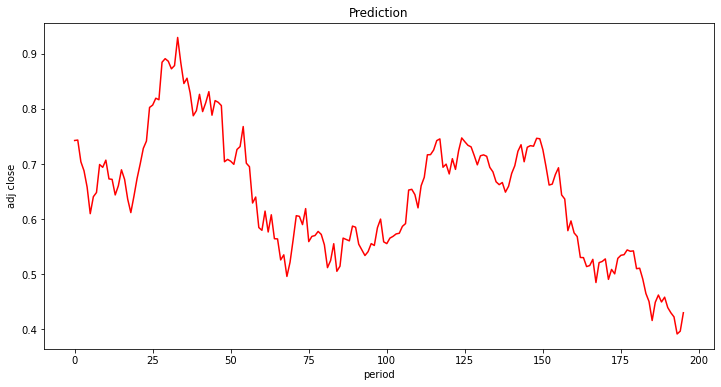

In [403]:
# 예측값 그래프 그리기
plt.figure(figsize=(12, 6))
plt.title('Prediction')
plt.ylabel('adj close')
plt.xlabel('period')
plt.plot(y_test, label='actual', color='red')
# plt.plot(pred1, label='prediction1', color='green')
# plt.plot(pred2, label='prediction2', color='pink')
# plt.plot(pred3, label='prediction3', color='blue')
plt.grid()
plt.legend(loc='best')

plt.show()